In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os


In [ ]:
  pos          dir            actual        simulated         error    start pos to fit
(-4,-4,-7)  (0.221,0.336,1)  (1824,1572)  (1867.7,1560.82 )  45.1063  ( -3.7 , -4.1 ,-7)
(-4,0,-7)   (0.248,0.015,1)  (1824,1572)  (1857.06,1554.21)  37.5435  ( -3.8 , -0.1 ,-7)
(-8,-4,-7)  (0.491,0.292,1)  (1824,1572)  (1861.73,1571.56)  37.7283  ( -7.8 , -4   ,-7)
(-8,-8,-7)  (0.446,0.533,1)  (1824,1572)  (1860.23,1565.04)  36.8936  ( -7.8 , -8.1 ,-7)
(0,-4,-7)  (-0.102,0.335,1)  (1824,1572)  (1851.1,1585.02 )  30.0694  ( 0.2  , -3.9 ,-7)
(0,4,-7)  (-0.106,-0.333,1)  (1824,1572)  (1854.85,1561.14)  32.7025  ( 0.2  , 3.9  ,-7)
(4,0,-7  )  (-0.429,0.01,1)  (1824,1572)  (1846.36,1558.92)  25.9057  ( 4.1  , -0.1 ,-7)
(8,-4,-7)  (-0.632,0.273,1)  (1824,1572)  (1845.41,1571.14)  21.4276  ( 8.1  , -4   ,-7)
(8,0,-7)   (-0.652,0.006,1)  (1824,1572)  (1842.57,1560.6 )  21.7936  ( 8.1  , -0.1 ,-7)
(-4,-8,-7)  (0.194,0.572,1)  (1824,1572)  (1859.17,1566.19)  35.645   ( -3.8 ,   -8 ,-7)
(-4,8,-7)  (0.204,-0.583,1)  (1824,1572)  (1845.04,1588.62)  26.815   ( -3.9 ,  8.1 ,-7)
(-8,0,-7)    (0.514,0.01,1)  (1824,1572)  (1863.96,1556.05)  43.0236  ( -7.7 , -0.1 ,-7)
(-8,4,-7)  (0.505,-0.291,1)  (1824,1572)  (1836.7,1574.12 )  12.8796  ( -7.9 , 4    ,-7)
(-8,8,-7)  (0.468,-0.536,1)  (1824,1572)  (1820.42,1577.23)  6.33903  ( -8   , 8    ,-7)
(0,-8,-7)  (-0.086,0.572,1)  (1824,1572)  (1844.11,1600.63)  34.9876  ( 0.1  , -7.8 ,-7)
(0,8,-7)  (-0.103,-0.586,1)  (1824,1572)  (1874.5,1566.07 )  50.844   ( 0.3  , 8    ,-7)
(4,-4,-7)  (-0.398,0.307,1)  (1824,1572)  (1828.89,1584.98)  13.8662  ( 4    , -3.9 ,-7)
(4,-8,-7)  (-0.351,0.547,1)  (1824,1572)  (1818.14,1596.83)  25.5097  ( 4    , -7.9 ,-7)

In [4]:
pos_org = [
    (-4,-4,-7),
    (-4,0,-7) ,
    (-8,-4,-7),
    (-8,-8,-7),
    (0,-4,-7) ,
    (0,4,-7)  ,
    (4,0,-7),
    (8,-4,-7) ,
    (8,0,-7)  ,
    (-4,-8,-7),
    (-4,8,-7) ,
    (-8,0,-7) ,
    (-8,4,-7) ,
    (-8,8,-7) ,
    (0,-8,-7) ,
    (0,8,-7)  ,
    (4,-4,-7) ,
    (4,-8,-7) ,]

In [5]:
pos_fit = [
    ( -3.7 , -4.1 ,-7),
    ( -3.8 , -0.1 ,-7),
    ( -7.8 , -4   ,-7),
    ( -7.8 , -8.1 ,-7),
    ( 0.2  , -3.9 ,-7),
    ( 0.2  , 3.9  ,-7),
    ( 4.1  , -0.1 ,-7),
    ( 8.1  , -4   ,-7),
    ( 8.1  , -0.1 ,-7),
    ( -3.8 ,   -8 ,-7),
    ( -3.9 ,  8.1 ,-7),
    ( -7.7 , -0.1 ,-7),
    ( -7.9 , 4    ,-7),
    ( -8   , 8    ,-7),
    ( 0.1  , -7.8 ,-7),
    ( 0.3  , 8    ,-7),
    ( 4    , -3.9 ,-7),
    ( 4    , -7.9 ,-7),
]

In [8]:
error_px = [
    45.1063,
    37.5435,
    37.7283,
    36.8936,
    30.0694,
    32.7025,
    25.9057,
    21.4276,
    21.7936,
    35.645 ,
    26.815 ,
    43.0236,
    12.8796,
    6.33903,
    34.9876,
    50.844 ,
    13.8662,
    25.5097,
]

In [9]:
pos_err = np.linalg.norm((np.array(pos_org) - np.array(pos_fit)), axis=1)
pos_err

array([0.31622777, 0.2236068 , 0.2       , 0.2236068 , 0.2236068 ,
       0.2236068 , 0.14142136, 0.1       , 0.14142136, 0.2       ,
       0.14142136, 0.31622777, 0.1       , 0.        , 0.2236068 ,
       0.3       , 0.1       , 0.1       ])

Text(0, 48, 'formula: 129.87x + 6.32')

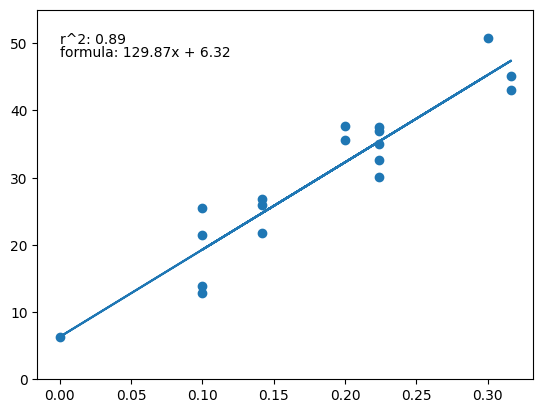

In [10]:
import scipy.stats
from pandas import DataFrame
df = DataFrame(np.array([pos_err, np.array(error_px)]).transpose(), columns=['error_pos', 'error_pix'])
m, b, r_value, p_value, std_err = scipy.stats.linregress(df['error_pos'], df['error_pix'])

fig, ax = plt.subplots()
ax.scatter(df['error_pos'],df['error_pix'])
ax.plot(df['error_pos'], m*df['error_pos'] + b)
plt.ylim([0,55])
ax.annotate('r^2: ' + str("{:.2f}".format(r_value**2)), xy=(0,50))
ax.annotate('formula: ' + str("{:.2f}".format(m)) + 'x + ' + str("{:.2f}".format(b)), xy=(0,48))


In [158]:
np.array([pos_err, np.array(error_px)]).transpose().shape

(18, 2)

22.722625 31.38595 37.381025
0.5499202790588477
0.03455618636357875


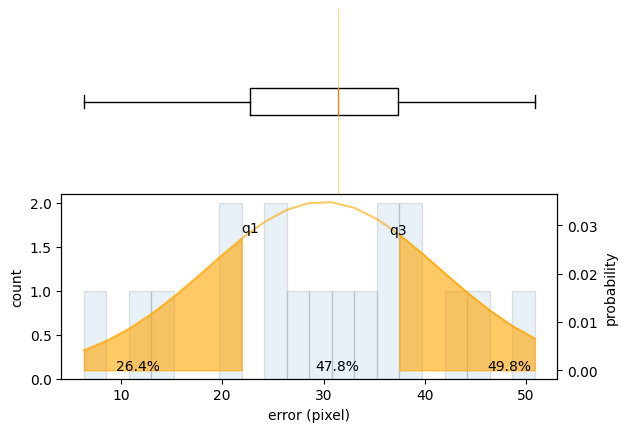

In [28]:
from scipy.stats import norm
import matplotlib.pyplot as plt

mu = np.mean(error_px)
sigma = np.std(error_px)

n_bins = 20
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)
ax12 = axes[1].twinx()

#histogram
n, bins, patches = axes[1].hist(error_px, n_bins, density=False, alpha=.1, edgecolor='black' )
pdf = 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2))

median, q1, q3 = np.percentile(error_px, 50), np.percentile(error_px, 25), np.percentile(error_px, 75)
print(q1, median, q3)

#probability density function
ax12.plot(bins, pdf, color='orange', alpha=.6)

#to ensure pdf and bins line up to use fill_between.
bins_1 = bins[(bins >= q1-1.5*(q3-q1)) & (bins <= q1)] # to ensure fill starts from Q1-1.5*IQR
bins_2 = bins[(bins <= q3+1.5*(q3-q1)) & (bins >= q3)]
pdf_1 = pdf[:int(len(pdf)/2)]
pdf_2 = pdf[int(len(pdf)/2):]
pdf_1 = pdf_1[(pdf_1 >= norm(mu,sigma).pdf(q1-1.5*(q3-q1))) & (pdf_1 <= norm(mu,sigma).pdf(q1))]
pdf_2 = pdf_2[(pdf_2 >= norm(mu,sigma).pdf(q3+1.5*(q3-q1))) & (pdf_2 <= norm(mu,sigma).pdf(q3))]

#fill from Q1-1.5*IQR to Q1 and Q3 to Q3+1.5*IQR
ax12.fill_between(bins_1, pdf_1, 0, alpha=.6, color='orange')
ax12.fill_between(bins_2, pdf_2, 0, alpha=.6, color='orange')

print(norm(mu, sigma).cdf(median))
print(norm(mu, sigma).pdf(median))

#add text to bottom graph.
ax12.annotate("{:.1f}%".format(100*norm(mu, sigma).cdf(q1)), xy=((q1-1.5*(q3-q1)+q1)/2, 0), ha='center')
ax12.annotate("{:.1f}%".format(100*(norm(mu, sigma).cdf(q3)-norm(mu, sigma).cdf(q1))), xy=(median, 0), ha='center')
ax12.annotate("{:.1f}%".format(abs(100*(norm(mu, sigma).cdf(q3+1.5*(q3-q1)-q3)-norm(mu, sigma).cdf(q3)))), xy=((q3+1.5*(q3-q1)+q3)/2, 0), ha='center')
ax12.annotate('q1', xy=(q1, norm(mu, sigma).pdf(q1)), ha='center')
ax12.annotate('q3', xy=(q3, norm(mu, sigma).pdf(q3)), ha='center')

ax12.set_ylabel('probability')
axes[1].set_ylabel('count')
axes[1].set_xlabel('error (pixel)')

#top boxplot
axes[0].boxplot(error_px, 0, 'gD', vert=False)
axes[0].axvline(median, color='orange', alpha=.6, linewidth=.5)
axes[0].axis('off')

plt.subplots_adjust(hspace=0)
plt.savefig('/Volumes/flamingo_data/_Salman/_calibration/Jan23_loft/dataset_may11/p.0p0p0_p0p0p0/error_dist.png',
            bbox_inches='tight', pad_inches=0.0, dpi=300)
plt.show()